Load and prepare the data.

In [3]:
import yfinance as yf
import pandas as pd

stock_symbol = "AAPL"
start_date = "2024-01-01"
end_date = "2025-06-01"
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

print("Columns in stock_data after download (before flattening):")
print(stock_data.columns)

# Flatten the MultiIndex columns
# This takes the second level of the MultiIndex (which is 'AAPL' in your case)
# and if the first level is 'Price', it will use the first level.
# A simpler approach is to use the second level if you are only downloading one ticker.
stock_data.columns = [col[0] for col in stock_data.columns.values]

# Alternatively, if you want to be more explicit about handling the 'Price' level
# and the ticker symbol:
# stock_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in stock_data.columns.values]
# If you are sure about the structure, simply accessing the first element of the tuple:
# stock_data.columns = [col[0] for col in stock_data.columns]


print("\nColumns in stock_data after flattening:")
print(stock_data.columns)
print("\nFirst 5 rows of stock_data after flattening:")
print(stock_data.head())


required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

if not all(col in stock_data.columns for col in required_cols):
    print("Warning: Missing one or more required columns after flattening.")
    missing_cols = [col for col in required_cols if col not in stock_data.columns]
    print(f"Missing columns: {missing_cols}")
else:
    # Now that the columns are flattened, this should work correctly
    stock_data.dropna(subset=required_cols, inplace=True)

print("\nStock data head after dropna (if applicable):")
print(stock_data.head())

/var/folders/g_/m25c6v895h36wbhhdpssj2rh0000gp/T/ipykernel_5117/1659742424.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Columns in stock_data after download (before flattening):
MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

Columns in stock_data after flattening:
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

First 5 rows of stock_data after flattening:
                 Close        High         Low        Open    Volume
Date                                                                
2024-01-02  184.290436  187.070083  182.553158  185.789453  82488700
2024-01-03  182.910522  184.528677  182.096477  182.880742  58414500
2024-01-04  180.587555  181.758969  179.565044  180.825800  71983600
2024-01-05  179.862839  181.431354  178.860187  180.666963  62303300
2024-01-08  184.210999  184.250716  180.180517  180.766224  59144500

Stock data head after dropna (if applicable):
                 Close        High         Low        Open  

Applying Analysis Indicators with TA-Lib
we can use TA-Lib to calculate various technical indicators such as
moving averages, RSI (Relative Strength Index), and MACD (Moving
Average Convergence Divergence)

In [4]:
import talib
# Assuming stock_data is already loaded and columns are flattened

# Calculate Moving Averages
stock_data['SMA_10'] = talib.SMA(stock_data['Close'], timeperiod=10)
stock_data['EMA_20'] = talib.EMA(stock_data['Close'], timeperiod=20)

# Calculate RSI
stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)

# Calculate MACD
macd, macdsignal, macdhist = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
stock_data['MACD'] = macd
stock_data['MACD_Signal'] = macdsignal
stock_data['MACD_Hist'] = macdhist

# For Task 3 preparation, calculate Daily Returns here as well
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

print("Stock data with new indicators:")
print(stock_data.tail())

Stock data with new indicators:
                 Close        High         Low        Open    Volume  \
Date                                                                   
2025-05-23  195.270004  197.699997  193.460007  193.669998  78432900   
2025-05-27  200.210007  200.740005  197.429993  198.300003  56288500   
2025-05-28  200.419998  202.729996  199.899994  200.589996  45339700   
2025-05-29  199.949997  203.809998  198.509995  203.580002  51396800   
2025-05-30  200.850006  201.960007  196.779999  199.369995  70819900   

                SMA_10      EMA_20        RSI      MACD  MACD_Signal  \
Date                                                                   
2025-05-23  207.311998  204.719983  38.828188 -1.065059    -0.380201   
2025-05-27  206.253999  204.290462  44.869601 -1.301828    -0.564526   
2025-05-28  205.003000  203.921846  45.117730 -1.455743    -0.742770   
2025-05-29  203.764999  203.543575  44.633524 -1.597235    -0.913663   
2025-05-30  202.705000  203.287

Visualize the Data:

visualizations to better understand the data and the impact of diﬀerent indicators on the stock price.

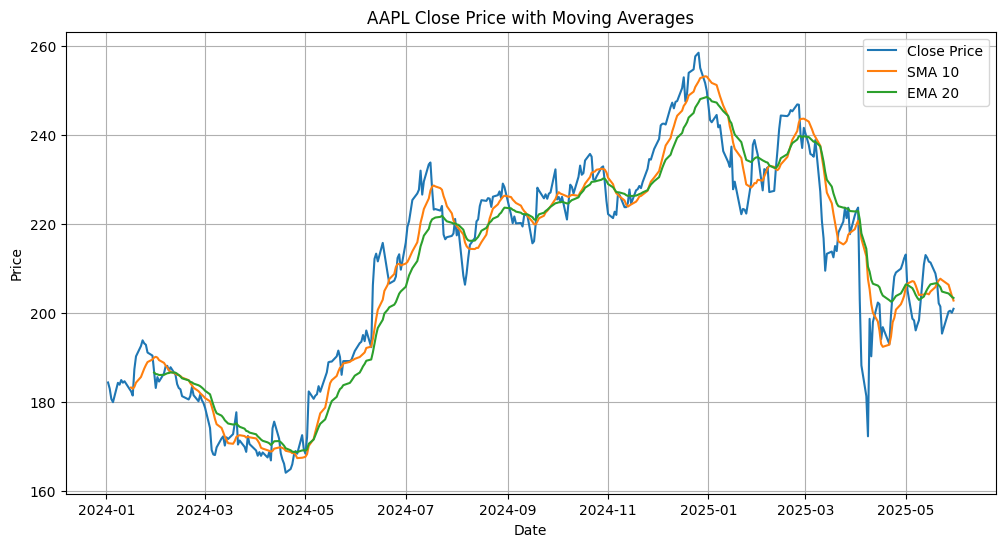

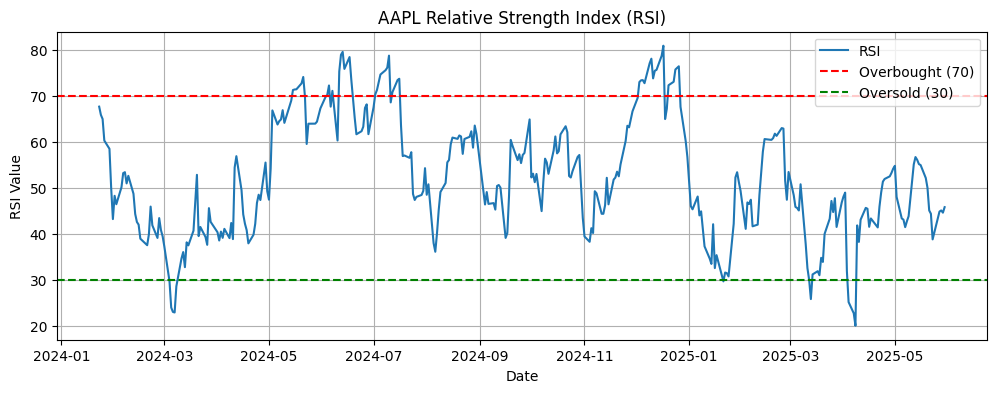

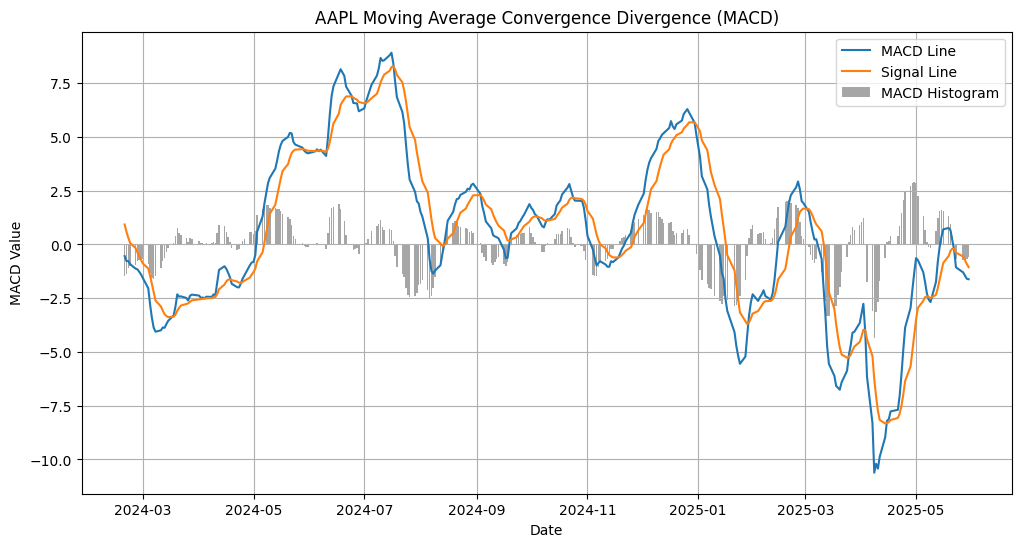

In [5]:
import matplotlib.pyplot as plt

# Plot Close Price with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['SMA_10'], label='SMA 10')
plt.plot(stock_data['EMA_20'], label='EMA 20')
plt.title(f'{stock_symbol} Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot RSI
plt.figure(figsize=(12, 4))
plt.plot(stock_data['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title(f'{stock_symbol} Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(stock_data['MACD'], label='MACD Line')
plt.plot(stock_data['MACD_Signal'], label='Signal Line')
plt.bar(stock_data.index, stock_data['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.7)
plt.title(f'{stock_symbol} Moving Average Convergence Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.grid(True)
plt.show()